In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns # For visualisations
import math
from scipy.stats import norm
from scipy.stats import f_oneway
from scipy.stats import gmean
from scipy.stats import mode
from scipy.stats import kurtosis
from pandas.core.frame import DataFrame
from scipy.stats import chi2
from matplotlib import patches

In [2]:
filename = "fish.txt"
time_weight_bait_data = pd.read_csv(filename, sep= " ", header= None, index_col= None)

In [3]:
time_weight_bait_data.describe

<bound method NDFrame.describe of          0     1  2
0    15.25  2.40  B
1     7.43  1.66  C
2     7.17  2.75  C
3     2.93  1.21  A
4    11.07  0.39  C
..     ...   ... ..
395   8.34  0.83  A
396  14.37  2.67  C
397   2.63  3.55  C
398   7.28  1.05  A
399  12.38  0.87  C

[400 rows x 3 columns]>

In [4]:
#Give human-readable names to the columns
time_weight_bait_data.columns=["Time","Weight","Type"]

In [5]:
time_weight_bait_data.describe()

,Time,Weight
count,400.000000,400.00000
mean,9.370525,1.66740
std,5.796400,1.10816
min,0.010000,0.01000
25%,4.325000,0.70750
50%,9.020000,1.61500
75%,13.747500,2.40000
max,22.270000,4.88000


In [6]:
print(time_weight_bait_data.skew())
print(time_weight_bait_data.kurtosis())

Time      0.266856
Weight    0.653793
dtype: float64
Time     -0.946594
Weight    0.161891
dtype: float64


In [7]:
time_weight_bait_data['Time'].describe()

count    400.000000
mean       9.370525
std        5.796400
min        0.010000
25%        4.325000
50%        9.020000
75%       13.747500
max       22.270000
Name: Time, dtype: float64

In [8]:
df = time_weight_bait_data.sort_values('Time')
#df = df.drop(columns='Type')

#arr_data = np.array(df)

In [9]:
ti_weight_bait = time_weight_bait_data.iloc[-400:,[0,1,2]].values
df_A = []
df_B = []
df_C = []
for item in ti_weight_bait:
    if item[2] == 'A':
        df_A.append(item)
    elif item[2] == 'B':
        df_B.append(item)
    elif item[2] == 'C':
        df_C.append(item)

df_A = pd.DataFrame(df_A)
df_A.columns=["Time","Weight","Type"]
print (df_A)

     Time  Weight Type
0    2.93    1.21    A
1    4.29    1.84    A
2    4.08    1.05    A
3    3.11    2.49    A
4    3.33    3.97    A
..    ...     ...  ...
74  12.08    1.27    A
75   3.03    2.85    A
76   5.22    1.26    A
77   8.34    0.83    A
78   7.28    1.05    A

[79 rows x 3 columns]


In [10]:
df_A = (df_A.drop('Type',axis=1)).sort_values('Time')
print(df_A)

     Time  Weight
52   0.26    2.54
36   0.39    1.85
48   0.55    0.19
16   0.65    2.26
55   0.78    0.99
..    ...     ...
27  17.06    0.53
47  18.22    1.92
60  18.36    0.98
30  19.95    1.30
57  20.79    0.01

[79 rows x 2 columns]


In [11]:
CategoryGroupLists=df_A.groupby('Time')['Weight'].apply(list)

In [12]:
CategoryGroupLists

Time
0.26     [2.54]
0.39     [1.85]
0.55     [0.19]
0.65     [2.26]
0.78     [0.99]
          ...  
17.06    [0.53]
18.22    [1.92]
18.36    [0.98]
19.95     [1.3]
20.79    [0.01]
Name: Weight, Length: 74, dtype: object

In [13]:
# unique = df['Time'].index.unique  #看有没有重复的时间值
b,s,t,w = np.unique(np.array(df_A['Time']),return_counts =True,return_index =True,return_inverse = True)
#print(b,s,t,w)

In [14]:
len(b)

74

In [15]:
y_uni = []
for i in b:
    if(len(CategoryGroupLists[i])==1):
        y_uni.append(CategoryGroupLists[i])
    elif (len(CategoryGroupLists[i])>1):
        y_uni.append([sum(CategoryGroupLists[i])])

In [16]:
y_unique = []
for i in range(len(y_uni)):
    y_unique.append(y_uni[i][0])

0.8242993332885362


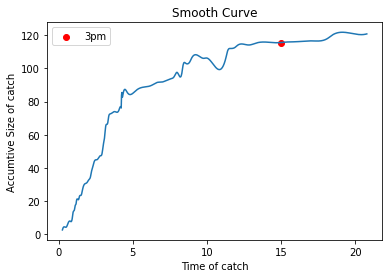

In [17]:
x_time = b
y_weight = y_unique
y_accmutive = []
totle = 0
for i in range(len(x_time)):
    totle = totle + y_weight[i]
    y_accmutive.append(totle)

from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 

model=make_interp_spline(x_time, y_accmutive)
xs=np.linspace(min(x_time),max(x_time),1000)
ys=model(xs)
didh4 = (model(15.0001)-model(15)) / 0.0001     
print (didh4)     


# slides=np.linspace(min(x_time),max(x_time),1000)
# max_slope = []
# for i in slides:
#     diff = (model(i+0.001)-model(i)) / 0.001
#     if (diff==a):
#         print(i)
#     max_slope.append(diff)
# print(max(max_slope))
#plt.plot([10,15+5],[115,1*model(15)+2],color ='orange',label = 'Fit curve') FOR A
#plt.plot([10,15+5],[250,1*model(15)+100],color ='orange',label = 'Fit curve') For C
plt.plot(xs, ys)
plt.scatter(15,model(15),color = 'r',label='3pm')
plt.title("Smooth Curve")
plt.xlabel("Time of catch")
plt.ylabel("Accumtive Size of catch")
plt.legend()
plt.savefig(('besttime_C.png'))

In [18]:
a=263.137824952949

In [19]:
max_index =4.226256256256256

In [20]:
model(max_index+0.001)

array(76.1862324)

In [21]:
CategoryGroupLists=df.groupby('Time')['Weight'].apply(list)

In [22]:
print(527.9704862471135,max_index,y_max)

NameError: name 'y_max' is not defined

In [ ]:
y = 527.9704862471135(0-3.1537407481496293 ) + 140.00204247018314

In [ ]:
1,525.05, 

In [ ]:
CategoryGroupLists

In [ ]:
arr = np.array(time_weight_bait_data)

In [ ]:
print(arr)
print(len(arr))

In [ ]:
time = np.array(df['Time'])
weight = np.array(df['Weight'])

In [ ]:
print(kurtosis(time,fisher = False))
print(kurtosis(weight,fisher = False))

In [ ]:
time = np.sort(time)
#算IQR of Time
median = (time[199]+time[200])/2
Q1 = (time[99]+time[100])/2
Q3 = (time[299]+time[300])/2
IQR = Q3-Q1
h = (2*IQR)/400**(1/3)
bins = (time[399]-time[0])/h

In [ ]:
print(IQR)
print(bins)
print(math.ceil(bins))

In [ ]:
#outlier
fig, ax = plt.subplots()
box_A = ax.boxplot(time_weight_bait_data['Time'])
plt.title("X distribution")
plt.xlabel("Time of Catch")
plt.ylabel("Count")
plt.savefig(('X_box.png'))


In [ ]:
ax = sns.distplot(time,bins= math.ceil(bins),axlabel='Time of catch',hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('X distribution')
plt.savefig(('X_hist.png'))

In [ ]:
weight = np.sort(weight)
#算IQR of Time
median = (weight[199]+weight[200])/2
Q1 = (weight[99]+weight[100])/2
Q3 = (weight[299]+weight[300])/2
IQR = Q3-Q1
h = (2*IQR)/400**(1/3)
bins = (weight[399]-weight[0])/h

In [ ]:
print(IQR)
print(bins)
print(math.ceil(bins))

In [ ]:
#plt.hist(weight,math.ceil(bins))
#plt.title("Wight distribution")
#plt.xlabel("Wight")
#plt.ylabel("Count")
#plt.show()
ax = sns.distplot(weight,bins= math.ceil(bins),axlabel='Size of catch',hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_title('Y distribution')
plt.savefig(('Y_hist.png'))


In [ ]:
fig, ax = plt.subplots()
box_A = ax.boxplot(time_weight_bait_data['Weight'])
plt.title("Y distribution")
plt.xlabel("Size of Catch")
plt.ylabel("Count")
plt.savefig(('Y_box.png'))

In [ ]:
#计算 A,B,C分别钓到鱼的重量
weight_A = 0
count_A = 0
weight_B = 0
count_B = 0
weight_C = 0
count_C = 0
for i in range(len(arr)):
    if arr[i][2] =='A':
        weight_A = weight_A+arr[i][1]
        count_A = count_A +1
    if arr[i][2] =='B':
        weight_B = weight_B+arr[i][1]
        count_B = count_B+1
    if arr[i][2] =='C':
        weight_C = weight_C+arr[i][1]
        count_C = count_C +1

In [ ]:
print(weight_A)
print(count_A)
print(weight_B)
print(count_B)
print(weight_C)
print(count_C)

In [ ]:
effective_A=weight_A/count_A # kg per count
effective_B=weight_B/count_B
effective_C=weight_C/count_C
print(effective_A)
print(effective_B)
print(effective_C)

In [ ]:
effective_list = np.array([effective_A,effective_B,effective_C])

In [ ]:
label = ('A','B','C')
plt.bar(label,effective_list,edgecolor = 'k')
plt.title("Effective comparison")
plt.xlabel("Type of bait")
plt.ylabel("weight per bait")

index = np.arange(len(label))
for a,b in zip(index, effective_list):
    plt.text(a,b,'%.2f'%b, ha='center',va='bottom',fontsize=10)

plt.savefig(('effective_list.png'))

In [ ]:
time_weight_bait_data.Type.value_counts()

In [ ]:
# 95% confidence interval- Time
mean = np.mean(time)
sumd = 0
for i in range(len(time)):
    sumd = sumd + (time[i]-mean)**2
sd_pop = math.sqrt(sumd/(len(time)-1))
sd_error = sd_pop/math.sqrt(len(time))
print(mean - norm.ppf(0.975)*sd_error)
print(mean + norm.ppf(0.975)*sd_error)

In [ ]:
# 95% confidence interval- Weight
mean = np.mean(weight)
sumd = 0
for i in range(len(weight)):
    sumd = sumd + (weight[i]-mean)**2
sd_pop = math.sqrt(sumd/(len(weight)-1))
sd_error = sd_pop/math.sqrt(len(weight))
print(mean - norm.ppf(0.975)*sd_error)
print(mean + norm.ppf(0.975)*sd_error)

In [ ]:
df.corr()['Time']

In [ ]:
plt.scatter(df['Time'],df['Type'])

In [ ]:
plt.scatter(df['Time'],df['Weight'])

In [ ]:
plt.scatter(df['Weight'],df['Type'])

In [ ]:
time_weight = time_weight_bait_data.drop('Type',axis=1)
add_Q = np.array(time_weight.sort_values('Time'))
x_time = b
y_weight = add_Q[:,1]

In [ ]:
time_weight = time_weight_bait_data.drop('Type',axis=1)
add_Q = np.array(time_weight.sort_values('Time'))
x_time = b
y_weight = add_Q[:,1]
y_accmutive = []
totle = 0
for i in range(len(x_time)):
    totle = totle + y_weight[i]
    y_accmutive.append(totle)
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt 

x=np.array(x_time)
y=np.array(y_accmutive)

model=make_interp_spline(x, y)

xs=np.linspace(0,23,1000)
ys=model(xs)

plt.plot(xs, ys)
plt.title("Smooth Spline Curve")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [ ]:
# plt.plot(add_Q[:,0], y_accmutive,'k--', linewidth=1.5, label='Theoretical')


from scipy.interpolate import UnivariateSpline
import matplotlib.pyplot as plt 
xi=np.array(x_time)
yi=np.array(y_accmutive)
spl = UnivariateSpline(xi, yi, s=0.1)            # s 的取值见下面说明
xs = np.linspace(0, 24, 1000)
plt.plot(xs, spl(xs))

# didh4 = (uvs(0.7001) - uvs(0.7000)) / 0.0001     # 求在 x = 0.7000 附近的导数
# print didh4      # 38.5919662219


# model=make_interp_spline(add_Q[:,0], y)

# xs=np.linspace(1,7,500)
# ys=model(xs)

# plt.plot(xs, ys)
# plt.title("Smooth Spline Curve")
# plt.xlabel("X")
# plt.ylabel("Y")
# plt.show()

In [ ]:
df_corr = time_weight_bait_data[['Type','Time','Weight']]

In [ ]:
df_corr

In [ ]:
CarData=df_corr
print(CarData.head())
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=CarData.groupby('Type')['Weight'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

In [ ]:
label = ('A','B','C')
plt.boxplot(CategoryGroupLists,labels=label)
plt.title("ANOVA Analysis of X and Z distribution")
plt.xlabel("Type of bait")
plt.savefig(('ANOVA_X.png'))
plt.show()

In [ ]:
QQ_A=df_corr.loc[df_corr['Type'] == 'A']
QQ_A.boxplot(grid = False)
plt.show()

In [ ]:
QQ_A.sort_values('Time')

In [ ]:
QQ_A.describe()

In [ ]:
QQ_A.corr()

In [ ]:
QQ_B=df_corr.loc[df_corr['Type'] == 'B']
QQ_B.boxplot(grid = False)
plt.show()

In [ ]:
QQ_B.describe()

In [ ]:
QQ_C=df_corr.loc[df_corr['Type'] == 'C']

print(QQ_C.describe())

In [ ]:
QQ_C=df_corr.loc[df_corr['Type'] == 'C']
QQ_C.boxplot(grid = False)
plt.show()

In [ ]:
QQ_C.describe()

In [ ]:
RR_A=time_weight_bait_data.loc[df_corr['Type'] == 'A']
RR_B=time_weight_bait_data.loc[df_corr['Type'] == 'B']
RR_C=time_weight_bait_data.loc[df_corr['Type'] == 'C']
arr_RR_A = np.array(RR_A.drop(['Type'],axis = 1))
arr_RR_B = np.array(RR_B.drop(['Type'],axis = 1))
arr_RR_C = np.array(RR_C.drop(['Type'],axis = 1))


In [ ]:
RR_A.describe()

In [ ]:
RR_A_xmean = arr_RR_A[:,0].mean()
RR_A_ymean = arr_RR_A[:,1].mean()
RR_A_covxy = np.cov(arr_RR_A[:,0],arr_RR_A[:,1])

In [ ]:
RR_A_covxy

In [ ]:
abs(RR_A_covxy[0,1])

In [ ]:
RR_B_xmean = arr_RR_B[:,0].mean()
RR_B_ymean = arr_RR_B[:,1].mean()
RR_B_covxy = np.cov(arr_RR_B[:,0],arr_RR_B[:,1])

In [ ]:
RR_C_xmean = arr_RR_C[:,0].mean()
RR_C_ymean = arr_RR_C[:,1].mean()
RR_C_covxy = np.cov(arr_RR_C[:,0],arr_RR_C[:,1])

In [ ]:
mA = np.array([RR_A_xmean,RR_A_ymean])
mB = np.array([RR_B_xmean,RR_B_ymean])
mC = np.array([RR_C_xmean,RR_C_ymean])

In [ ]:
cA = RR_A_covxy
cB = RR_B_covxy
cC = RR_C_covxy

In [ ]:
def gauss2D(x, m, C): #Probability density 2D 高斯
    n = m.shape[0]
    Ci = np.linalg.inv(C) #矩阵求逆
    dC = np.linalg.det(Ci) #矩阵求行列式(scaler)
    num = np.exp(-0.5 * np.dot((x-m).T, np.dot(Ci, (x-m)))) #马氏
    den = np.sqrt((2*np.pi)**n * dC)
    return num/den


def twoDGaussianPlot (nx, ny, m, C): #
    x = np.linspace(0, 20, nx) #均匀返回数字 nx(50)多少个
    y = np.linspace(0, 20, ny)
    X, Y = np.meshgrid(x, y, indexing='ij') # 返回两个二维矩阵，meshgrid函数将两个输入的数组x和y进行扩展，前一个是竖向扩展，后一个是横向扩展
    #X=50*40 T=50*40  ij 为下标
    
    Z = np.zeros([nx, ny]) #50*40
    for i in range(nx):
        for j in range(ny):
            xvec = np.array([X[i,j], Y[i,j]]) # 50*40的 array 就是二维数组，一个元素是一个（x，y）
            Z[i,j] = gauss2D(xvec, m, C)  #返回Probability density
    return X, Y, Z


In [ ]:
# Plot contours
#
nx, ny = 100, 80
Xp1, Yp1, Zp1 = twoDGaussianPlot (nx, ny, mA, cA)
Xp2, Yp2, Zp2 = twoDGaussianPlot (nx, ny, mB, cB)
Xp3, Yp3, Zp3 = twoDGaussianPlot (nx, ny, mC, cC)

In [ ]:
fig, ax = plt.subplots()
ax.scatter(RR_A['Time'],RR_A['Weight'],c='r',label = 'A')
ax.scatter(RR_B['Time'],RR_B['Weight'],c='g',label = 'B')
ax.scatter(RR_C['Time'],RR_C['Weight'],c='b',label = 'C')
ax.set_xlim(0, 24)
ax.set_ylim(0, 5.5)
ax.contour(Xp1, Yp1, Zp1, 1,colors = 'r')
ax.contour(Xp2, Yp2, Zp2, 1,colors = 'g')
ax.contour(Xp3, Yp3, Zp3, 1,colors = 'b')
plt.xlabel('Time of catch')
plt.ylabel('Size of catch')
plt.title('X,Y,Z distribution')
plt.legend()
plt.savefig(('XYZ_distribution'))

In [ ]:
# import statsmodels.api as sm
# time_weight_bait_data_sorted = time_weight_bait_data.sort_values("Time")
# x = time_weight_bait_data_sorted.iloc[:200,0]
# y = time_weight_bait_data_sorted.iloc[:200,1]
# x = sm.add_constant(x)
# model = sm.OLS(y,x).fit()
# print(model.summary())

In [ ]:
# predicts = model.predict()
# x_test = time_weight_bait_data_sorted.iloc[200:,0]
# y_test = time_weight_bait_data_sorted.iloc[200:,1]
# plt.scatter(x_test,y_test,label='real value')
# plt.plot(x_test,predicts, color = 'red', label = 'predict value')
# plt.legend()
# plt.show()

In [ ]:
QQ_A.columns = ['Type of bait','Time of catch','Size of catch']

In [ ]:
# Create a regplot to figure out the correlation

ax = sns.regplot(x="Time of catch", y="Size of catch", data=QQ_A)
ax.set_title('X,Y relation for A bait')
plt.savefig(('XY_corr_A.png'))
# What is the regression method that this function uses? 
# Try to read its documents and find out

In [ ]:
QQ_A.boxplot(grid = False)
plt.title('Box plot of X,Y for A bait')
plt.savefig(('outlier_XY.png'))

In [ ]:
print(QQ_A.corr())
print(QQ_A)

In [ ]:
data =QQ_A.drop(['Type'],axis = 1)

In [ ]:
data

In [ ]:
#除去outlier  没什么用
df = data
df = df.to_numpy()
# Covariance matrix
covariance  = np.cov(df , rowvar=False)

# Covariance matrix power of -1
covariance_pm1 = np.linalg.inv(covariance)

# Center point
centerpoint = np.mean(df, axis=0)
# Distances between center point and 
distances = []#i=78
for i, val in enumerate(df):
    p1 = val
    p2 = centerpoint
    distance = np.dot((p1-p2).T, np.dot(covariance_pm1, (p1-p2)))
    #(p1-p2).T.dot(covariance_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

# Cutoff (threshold) value from Chi-Sqaure Distribution for detecting outliers 
cutoff = chi2.ppf(0.95, df.shape[1])

# Index of outliers
outlierIndexes = np.where(distances > cutoff )

print('--- Index of Outliers ----')
print(outlierIndexes)
# array([24, 35, 67, 81])


In [ ]:
print(df[26,:],df[30,:],df[47,:],df[51,:],df[57,:])

In [ ]:
df = df[distances<=cutoff,:]

In [ ]:
## Finding ellipse dimensions 
# pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
# ell_radius_x = np.sqrt(1 + pearson)
# ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(-v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
ellipse.set_alpha(0.3)
ax.scatter(df[: , 0], df[ : , 1],label = 'inlier')
ax.scatter(4.24,4.5, c='r',label = 'outlier')
ax.scatter(19.95,1.3, c='r')
ax.scatter(18.22,1.92, c='r')
ax.scatter(3.16,4.88, c='r')
ax.scatter(2.079e+01,1.000e-02, c='r')
ax.plot(df[: , 0],intercept+slope*df[: , 0],'#EDFA00',label = 'fitted line')
ax.set_title('outlier detection')
plt.xlabel('Time of catch')
plt.ylabel('Size of catch')
plt.legend()
plt.savefig(('eliminate_outlier.png'))

In [ ]:
import scipy.stats as st
slope, intercept,r_vaue,p_value,std_err = st.linregress(df[:,0],df[:,1])

In [ ]:
print(slope)
print(intercept)
print(r_vaue)
print(p_value)
print(std_err)

In [ ]:

df=pd.DataFrame(df,index = None,columns = ['a','b'])
sns.regplot(x="a", y="b", data=df)
plt.title('X,Y relation for A bait after eliminating outliers')
plt.xlabel('Time of catch')
plt.ylabel('Size of catch')
plt.savefig(('eliminate_results.png'))

In [ ]:
df.corr()

In [ ]:
time_A =np.array(QQ_A['Time'])
time_A = np.sort(time_A)
#算IQR of Time_A

median = 3.570000
Q1 = 1.975000
Q3 = 8.465000
IQR = Q3-Q1

ex_min = Q1-1.5*IQR
ex_max = Q3+1.5*IQR

In [ ]:
print(ex_min)
print(ex_max)

In [ ]:
QQ_A.describe()

In [ ]:
time_A

In [ ]:
Weight_A =np.array(QQ_A['Weight'])
Weight_A = np.sort(Weight_A)
#算IQR of Time_A

median = 1.340000
Q1 = 0.780000
Q3 = 2.085000
IQR = Q3-Q1

ex_min = Q1-1.5*IQR
ex_max = Q3+1.5*IQR
print(ex_min)
print(ex_max)

In [ ]:
Weight_A

In [ ]:
QQ_A_arr = QQ_A.sort_values('Time')

In [ ]:
QQ_A_arr

In [ ]:
# Create a regplot to figure out the correlation

sns.regplot(x="Time", y="Weight", data=QQ_B)

# What is the regression method that this function uses? 
# Try to read its documents and find out

In [ ]:
QQ_B.corr()

In [ ]:
# Create a regplot to figure out the correlation

sns.regplot(x="Time", y="Weight", data=QQ_C)

# What is the regression method that this function uses? 
# Try to read its documents and find out

In [ ]:
QQ_C.corr()